## Analysis on the dataset of random 50 users

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df = pd.read_csv('Dataset/final.csv')

In [122]:
df

,contestId,handle,rank,oldRating,newRating,startTimeSeconds,acceptance_rate,avg_rating,string suffix structures,matrices,...,graph matchings,fft,2-sat,schedules,hashing,dsu,flows,chinese remainder theorem,expression parsing,meet-in-the-middle
0,2055,creator_by_kamroncik,14207,0,413,1736692500,0.096774,1100.000000,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2072,creator_by_kamroncik,3316,413,796,1740494100,0.219512,871.428571,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2090,creator_by_kamroncik,6285,796,952,1742708100,0.458824,1927.027027,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2084,creator_by_kamroncik,1825,952,1248,1743863700,0.474747,1897.368421,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2093,creator_by_kamroncik,119,1248,1541,1744122900,0.486726,1809.302326,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,2071,CatAndDog,183,1748,1932,1740753300,0.615385,1291.666667,NaN,NaN,...,0.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1462,2075,CatAndDog,112,1932,2070,1742222100,0.622222,1300.000000,NaN,NaN,...,0.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1463,2085,CatAndDog,9,2070,2248,1742654100,0.640000,1312.500000,NaN,NaN,...,0.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1464,2084,CatAndDog,363,2248,2275,1743863700,0.637931,1348.648649,NaN,NaN,...,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [123]:
df.isnull().sum()

contestId                      0
handle                         0
rank                           0
oldRating                      0
newRating                      0
startTimeSeconds               0
acceptance_rate                0
avg_rating                     1
string suffix structures     572
matrices                     294
graphs                        53
*special                     610
brute force                    2
data structures               25
ternary search               273
interactive                  404
dp                            16
constructive algorithms       10
binary search                 15
combinatorics                 48
games                         45
divide and conquer           397
two pointers                  29
strings                        7
geometry                      51
greedy                         2
dfs and similar              110
math                           0
bitmasks                      52
trees                        144
number the

## What is the reason of these errors ?
#### The codeforces API when called gives the problem list along with the problem tags from which we have calculated the statistics
#### We counted the problem tags and included them in their individual dataframe objects but if someone for example hadn't solve any problem for a topic lets say meet-in-the-middle (maximum missing) then it would be missing for his dataframe and in concat it would be a null value
#### So ideally all the nulls in problem list should be replaced with 0
## But the case of a missing avg rating
#### we can impute that with KNN imputation

In [124]:
columns_to_impute_zero = df.columns.drop('avg_rating').tolist()
columns_to_impute_zero

['contestId',
 'handle',
 'rank',
 'oldRating',
 'newRating',
 'startTimeSeconds',
 'acceptance_rate',
 'string suffix structures',
 'matrices',
 'graphs',
 '*special',
 'brute force',
 'data structures',
 'ternary search',
 'interactive',
 'dp',
 'constructive algorithms',
 'binary search',
 'combinatorics',
 'games',
 'divide and conquer',
 'two pointers',
 'strings',
 'geometry',
 'greedy',
 'dfs and similar',
 'math',
 'bitmasks',
 'trees',
 'number theory',
 'implementation',
 'shortest paths',
 'sortings',
 'probabilities',
 'graph matchings',
 'fft',
 '2-sat',
 'schedules',
 'hashing',
 'dsu',
 'flows',
 'chinese remainder theorem',
 'expression parsing',
 'meet-in-the-middle']

In [125]:
df[columns_to_impute_zero] = df[columns_to_impute_zero].fillna(0)

In [126]:
df['avg_rating'].isnull().sum()

np.int64(1)

In [127]:
df.describe()

,contestId,rank,oldRating,newRating,startTimeSeconds,acceptance_rate,avg_rating,string suffix structures,matrices,graphs,...,graph matchings,fft,2-sat,schedules,hashing,dsu,flows,chinese remainder theorem,expression parsing,meet-in-the-middle
count,1466.000000,1466.000000,1466.000000,1466.000000,1.466000e+03,1466.000000,1465.000000,1466.000000,1466.000000,1466.000000,...,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000
mean,1839.760573,4806.064802,1350.580491,1399.892224,1.690205e+09,0.431692,1168.597814,1.141201,1.510232,20.624829,...,1.875853,0.392906,0.510914,0.654161,6.668486,7.872442,2.019782,0.425648,0.491132,0.435880
std,310.484390,4633.337379,468.468676,407.003581,6.237924e+07,0.132538,268.988594,3.237765,3.482021,50.993365,...,3.833693,1.572738,1.599984,1.096585,14.202987,18.607700,4.405119,0.847560,0.810505,1.308015
min,427.000000,4.000000,0.000000,344.000000,1.399045e+09,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1762.250000,980.500000,1110.250000,1139.000000,1.670856e+09,0.340572,998.181818,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1946.000000,3541.500000,1370.500000,1394.000000,1.711637e+09,0.433821,1125.675676,0.000000,0.000000,4.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2033.750000,7223.500000,1644.500000,1664.000000,1.731163e+09,0.513072,1328.232759,1.000000,2.000000,14.000000,...,2.000000,0.000000,0.000000,1.000000,6.000000,6.000000,1.000000,1.000000,1.000000,0.000000
max,2103.000000,27149.000000,2366.000000,2366.000000,1.745246e+09,1.000000,3100.000000,23.000000,31.000000,394.000000,...,31.000000,13.000000,17.000000,6.000000,104.000000,145.000000,25.000000,5.000000,3.000000,9.000000


In [128]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
imputed = df.drop(columns='handle')
imputed = imputer.fit_transform(imputed)
imputed_df = pd.DataFrame(imputed, columns=df.drop(columns='handle').columns)
imputed_df['handle'] = df['handle']
imputed_df = imputed_df[df.columns]
imputed_df

,contestId,handle,rank,oldRating,newRating,startTimeSeconds,acceptance_rate,avg_rating,string suffix structures,matrices,...,graph matchings,fft,2-sat,schedules,hashing,dsu,flows,chinese remainder theorem,expression parsing,meet-in-the-middle
0,2055.0,creator_by_kamroncik,14207.0,0.0,413.0,1.736692e+09,0.096774,1100.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2072.0,creator_by_kamroncik,3316.0,413.0,796.0,1.740494e+09,0.219512,871.428571,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2090.0,creator_by_kamroncik,6285.0,796.0,952.0,1.742708e+09,0.458824,1927.027027,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2084.0,creator_by_kamroncik,1825.0,952.0,1248.0,1.743864e+09,0.474747,1897.368421,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2093.0,creator_by_kamroncik,119.0,1248.0,1541.0,1.744123e+09,0.486726,1809.302326,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,2071.0,CatAndDog,183.0,1748.0,1932.0,1.740753e+09,0.615385,1291.666667,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1462,2075.0,CatAndDog,112.0,1932.0,2070.0,1.742222e+09,0.622222,1300.000000,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1463,2085.0,CatAndDog,9.0,2070.0,2248.0,1.742654e+09,0.640000,1312.500000,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1464,2084.0,CatAndDog,363.0,2248.0,2275.0,1.743864e+09,0.637931,1348.648649,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [129]:
imputed_df['changeRating'] = imputed_df['newRating'] - imputed_df['oldRating']

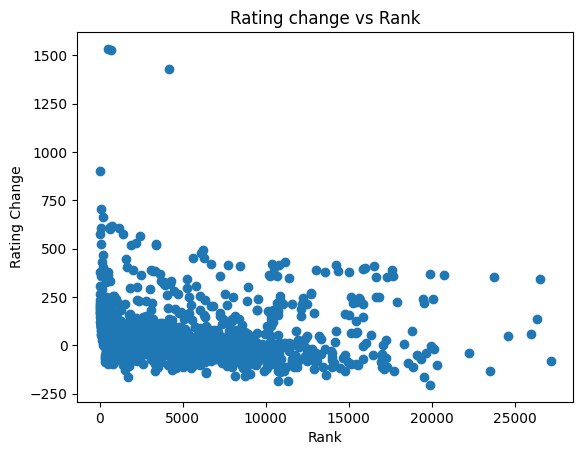

In [130]:
# Scatter plot of avg_rating vs rank
plt.scatter(x=imputed_df['rank'], y=imputed_df['changeRating'])
plt.xlabel('Rank')
plt.ylabel('Rating Change')
plt.title('Rating change vs Rank')

# Show the plot
plt.show()

## There should be higher correlation
### But why is there low correlation ?
#### Probable reason may be how we took the sample data is we have taken most recent contests and then from the participants we have taken some random users and recorded their all information. As all the contests dont have same participants it causes low correlation.
#### Also the user's old rating matter in the ammount of change he would get in the contest
### Would this matter to our goal ?
#### If we want to evaluate users next performance based on last one it does not matter that much as this system often works with a previously well defined algorithm which we dont need to predict

## Visualising rating change with old rating

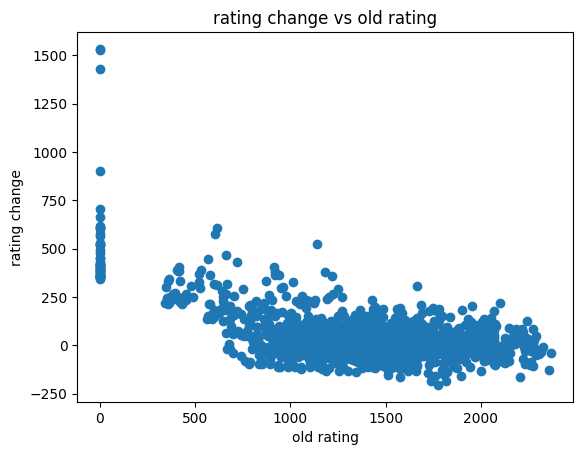

In [131]:
plt.scatter(imputed_df['oldRating'], imputed_df['changeRating'])
plt.xlabel('old rating')
plt.ylabel('rating change')
plt.title('rating change vs old rating')
plt.show()

## From the graph we can see there are abnormal high values at oldRating = 0
### Why is there such sudden difference from the rest ?
#### As the users starts we cant priorly predict their performance and some users use multiple accounts which can cause these
### Is this data useful ?
#### No. We cant predict anything when every entry is 0 so we shall drop those

In [132]:
## For sake of interest wanted to see the outlier names
imputed_df[imputed_df['changeRating'] > 1000]

,contestId,handle,rank,oldRating,newRating,startTimeSeconds,acceptance_rate,avg_rating,string suffix structures,matrices,...,fft,2-sat,schedules,hashing,dsu,flows,chinese remainder theorem,expression parsing,meet-in-the-middle,changeRating
52,1230.0,ivatopuria,4163.0,0.0,1429.0,1.569248e+09,0.329412,950.719424,0.0,0.0,...,0.0,0.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,1429.0
512,965.0,MermaidMolester,498.0,0.0,1533.0,1.524678e+09,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1533.0
1110,427.0,frankbozar,712.0,0.0,1526.0,1.399045e+09,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1526.0


In [133]:
cleaned_df = imputed_df.drop(imputed_df[imputed_df['oldRating'] == 0].index)
cleaned_df

,contestId,handle,rank,oldRating,newRating,startTimeSeconds,acceptance_rate,avg_rating,string suffix structures,matrices,...,fft,2-sat,schedules,hashing,dsu,flows,chinese remainder theorem,expression parsing,meet-in-the-middle,changeRating
1,2072.0,creator_by_kamroncik,3316.0,413.0,796.0,1.740494e+09,0.219512,871.428571,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,383.0
2,2090.0,creator_by_kamroncik,6285.0,796.0,952.0,1.742708e+09,0.458824,1927.027027,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,156.0
3,2084.0,creator_by_kamroncik,1825.0,952.0,1248.0,1.743864e+09,0.474747,1897.368421,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,296.0
4,2093.0,creator_by_kamroncik,119.0,1248.0,1541.0,1.744123e+09,0.486726,1809.302326,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,293.0
5,2096.0,creator_by_kamroncik,11858.0,1541.0,1431.0,1.745073e+09,0.482517,1638.596491,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,2071.0,CatAndDog,183.0,1748.0,1932.0,1.740753e+09,0.615385,1291.666667,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,184.0
1462,2075.0,CatAndDog,112.0,1932.0,2070.0,1.742222e+09,0.622222,1300.000000,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,138.0
1463,2085.0,CatAndDog,9.0,2070.0,2248.0,1.742654e+09,0.640000,1312.500000,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,178.0
1464,2084.0,CatAndDog,363.0,2248.0,2275.0,1.743864e+09,0.637931,1348.648649,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,27.0


## After cleaning

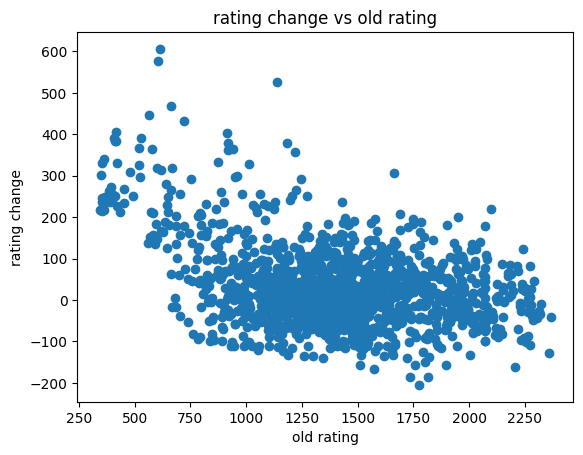

In [134]:
plt.scatter(cleaned_df['oldRating'], cleaned_df['changeRating'])
plt.xlabel('old rating')
plt.ylabel('rating change')
plt.title('rating change vs old rating')
plt.show()

## There's still some outliers visible which are away from the clusters
### But removing them may cause bias in the model to the higher p-values
### So we aren't considering removing them

In [135]:
cleaned_df.head()

,contestId,handle,rank,oldRating,newRating,startTimeSeconds,acceptance_rate,avg_rating,string suffix structures,matrices,...,fft,2-sat,schedules,hashing,dsu,flows,chinese remainder theorem,expression parsing,meet-in-the-middle,changeRating
1,2072.0,creator_by_kamroncik,3316.0,413.0,796.0,1.740494e+09,0.219512,871.428571,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,383.0
2,2090.0,creator_by_kamroncik,6285.0,796.0,952.0,1.742708e+09,0.458824,1927.027027,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,156.0
3,2084.0,creator_by_kamroncik,1825.0,952.0,1248.0,1.743864e+09,0.474747,1897.368421,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,296.0
4,2093.0,creator_by_kamroncik,119.0,1248.0,1541.0,1.744123e+09,0.486726,1809.302326,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,293.0
5,2096.0,creator_by_kamroncik,11858.0,1541.0,1431.0,1.745073e+09,0.482517,1638.596491,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-110.0


## Visualizing Current Rating vs Avg rating of problem solved

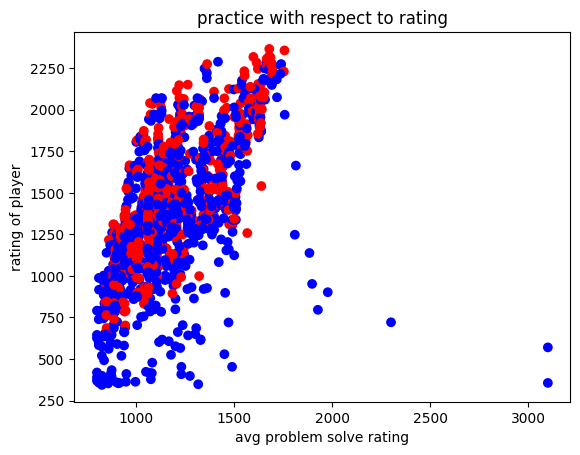

In [136]:
# Assign colors based on the condition
colors = ['blue' if change > 0 else 'red' for change in cleaned_df['changeRating']]

# Scatter plot with conditional coloring
plt.scatter(cleaned_df['avg_rating'], cleaned_df['oldRating'], c=colors)
plt.xlabel('avg problem solve rating')
plt.ylabel('rating of player')
plt.title('practice with respect to rating')
plt.show()

### In the plot we can see that as rating of user increases the avg problem solving in general increases though the increase or decrease is pretty random for most cases

## Visualization of problem type distribution

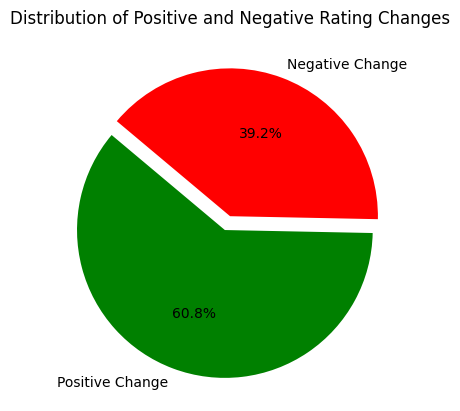

In [137]:
# Count the occurrences of positive and negative changes
positive_count = (cleaned_df['changeRating'] > 0).sum()
negative_count = (cleaned_df['changeRating'] <= 0).sum()

# Data for the pie chart
labels = ['Positive Change', 'Negative Change']
sizes = [positive_count, negative_count]
colors = ['green', 'red']
explode = (0.1, 0)  # Slightly explode the first slice (positive change)

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Positive and Negative Rating Changes')
plt.show()

#### It seems like a bias in the dataset
##### But its natural as the users are trying to get as good as possible so its obvious that its not totally random and so the number of positives should be higher for any set contatining randomly choosed participants

## Problem Type Distribution

In [138]:
# Group by 'handle' and get the most recent contest for each user
most_recent_contests = df.loc[df.groupby('handle')['startTimeSeconds'].idxmax()]
most_recent_contests.head()

,contestId,handle,rank,oldRating,newRating,startTimeSeconds,acceptance_rate,avg_rating,string suffix structures,matrices,...,graph matchings,fft,2-sat,schedules,hashing,dsu,flows,chinese remainder theorem,expression parsing,meet-in-the-middle
370,2103,23245A0204,12771,799,781,1745246100,0.230769,837.500000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1235,2094,23mc3043,16820,369,617,1744558500,0.500000,800.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,2070,ADivT_,922,1596,1663,1740666900,0.527697,1366.197183,0.0,1.0,...,2.0,1.0,1.0,1.0,2.0,5.0,1.0,0.0,0.0,0.0
1411,2040,Ali_Alp_Yazici,2063,1639,1628,1733668500,0.237578,1065.032680,0.0,1.0,...,2.0,0.0,0.0,2.0,4.0,6.0,0.0,1.0,0.0,0.0
1246,2093,AyushDubey23,15457,663,725,1744122900,0.313589,937.647059,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [139]:
problem_type_columns = most_recent_contests.columns[8:]
print(problem_type_columns)

Index(['string suffix structures', 'matrices', 'graphs', '*special',
       'brute force', 'data structures', 'ternary search', 'interactive', 'dp',
       'constructive algorithms', 'binary search', 'combinatorics', 'games',
       'divide and conquer', 'two pointers', 'strings', 'geometry', 'greedy',
       'dfs and similar', 'math', 'bitmasks', 'trees', 'number theory',
       'implementation', 'shortest paths', 'sortings', 'probabilities',
       'graph matchings', 'fft', '2-sat', 'schedules', 'hashing', 'dsu',
       'flows', 'chinese remainder theorem', 'expression parsing',
       'meet-in-the-middle'],
      dtype='object')


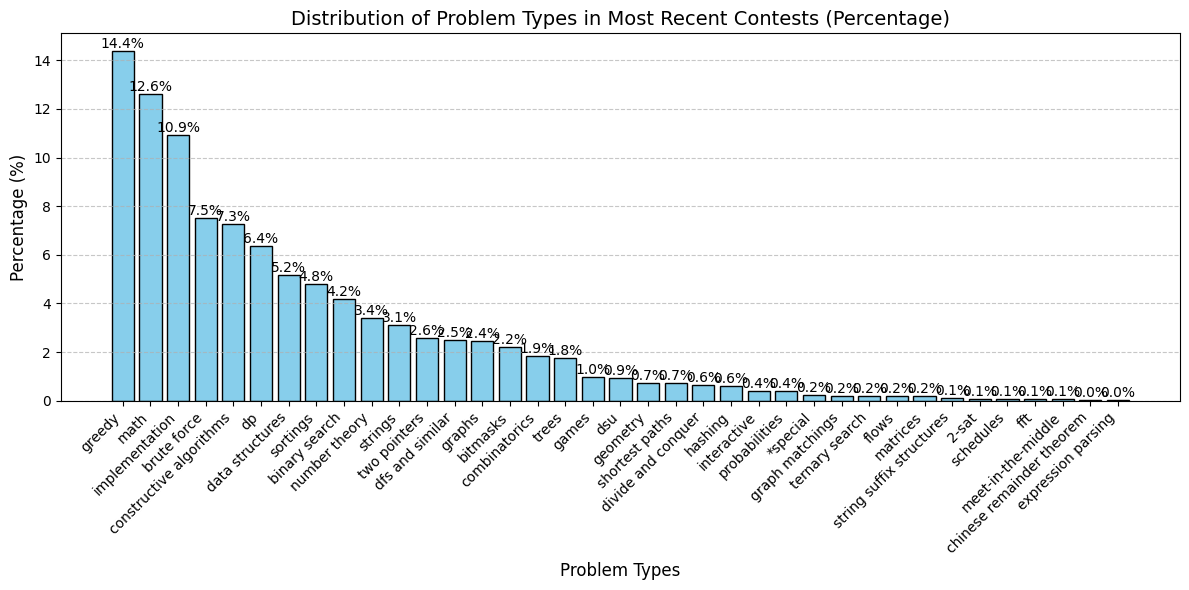

In [140]:
# Normalize the occurrences of different problem types to percentages
problem_type_counts = most_recent_contests[problem_type_columns].sum()
problem_type_counts_percentage = (problem_type_counts / problem_type_counts.sum()) * 100

# Sort the problem types in decreasing order
problem_type_counts_percentage = problem_type_counts_percentage.sort_values(ascending=False)

# Create a bar plot for problem type distribution in percentages
plt.figure(figsize=(12, 6))
bars = plt.bar(problem_type_counts_percentage.index, problem_type_counts_percentage.values, color='skyblue', edgecolor='black')

# Add percentage values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.xlabel('Problem Types', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Distribution of Problem Types in Most Recent Contests (Percentage)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better visualization
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

## Distribution of Ratings

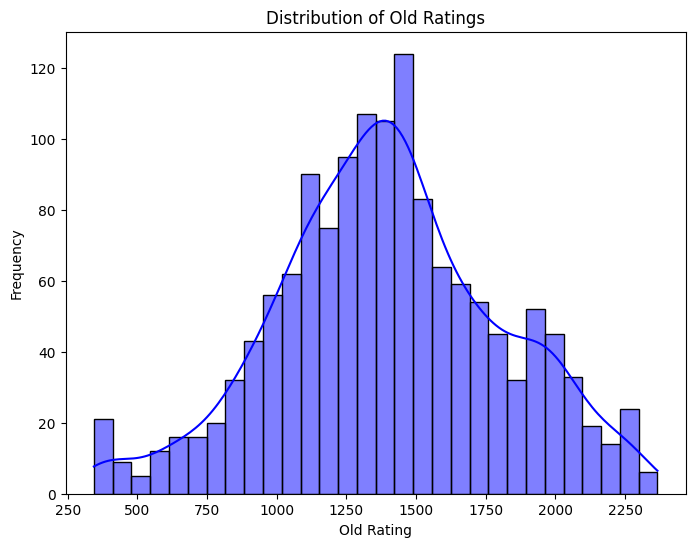

In [141]:
# Plot distribution of oldRating
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_df['oldRating'], kde=True, color='blue', bins=30)
plt.title('Distribution of Old Ratings')
plt.xlabel('Old Rating')
plt.ylabel('Frequency')
plt.show()

#### The distribution of Ranks is as expected to be gaussian

## Rating Change Over Time

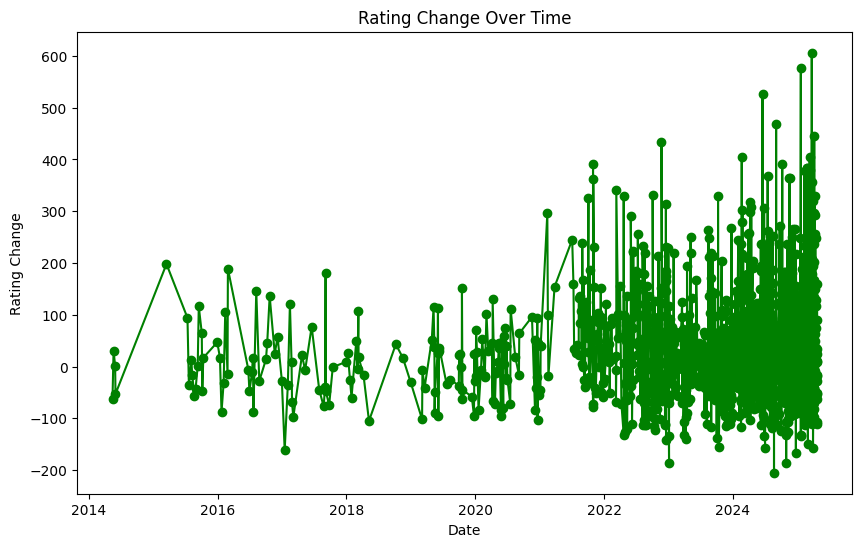

In [142]:
# Line plot for rating change over time
cleaned_df['date'] = pd.to_datetime(cleaned_df['startTimeSeconds'], unit='s')  # Convert timestamp to datetime
cleaned_df.sort_values(by='date', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(cleaned_df['date'], cleaned_df['changeRating'], marker='o', linestyle='-', color='green')
plt.title('Rating Change Over Time')
plt.xlabel('Date')
plt.ylabel('Rating Change')
plt.show()

### Saving the cleaned dataset

In [143]:
cleaned_df.to_csv('Dataset/cleaned_data.csv')